<a href="https://colab.research.google.com/github/bhargavpirates/MultiDomainReview_SentimentAnalysis/blob/master/MultiDomain_MachineLearning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## Sentiment analysis on DomainSentiment Data


### import Libraries

In [0]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns

import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import pickle

from tqdm import tqdm
import os


from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

#from gensim.models import Word2Vec
#from gensim.models import KeyedVectors
import pickle

from tqdm import tqdm


from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

### working this problem on googleCollab So mounting Google DRive data into Collab

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!cp -r  "/content/drive/My Drive/domain_sentiment_data.tar/sorted_data_acl/books" "books"
!cp -r  "/content/drive/My Drive/domain_sentiment_data.tar/sorted_data_acl/dvd" "dvd"
!cp -r  "/content/drive/My Drive/domain_sentiment_data.tar/sorted_data_acl/electronics" "electronics"
!cp -r  "/content/drive/My Drive/domain_sentiment_data.tar/sorted_data_acl/kitchen_&_housewares" "kitchen_&_housewares"

## From XML Data extracting requried ReviewText Data and storing them in a .txt file

In [5]:
data_list=["dvd/","books/","electronics/","kitchen_&_housewares/"]
for idx in range(4):

    pos_file = data_list[idx] +"positive.review"
    neg_file = data_list[idx] +"negative.review"
    
    print("postive file_name ::: {}".format(pos_file))
    print("negative file_name ::: {}".format(neg_file))
    
    with open(pos_file,'r',encoding='utf-8') as f:
        pos = f.readlines()
    with open(neg_file,'r',encoding='utf-8') as f:
        neg = f.readlines()
    
    lst = []
    final_pos=[]
    final_neg=[]
    
    for i in range(len(pos)):
        if(pos[i]=="<review_text>\n"):
            lst.append(i)
        elif(pos[i]=="</review_text>\n"):
            lst.append(i)   
        if(len(lst)==2):
            a=pos[ lst[0]+1 : lst[1] ]
            stng=" ".join(a)
            lst.clear()
            final_pos.append(stng.replace("\n",""))
            
    for i in range(len(neg)):
        if(neg[i]=="<review_text>\n"):
            lst.append(i)
        elif(neg[i]=="</review_text>\n"):
            lst.append(i)
    
        if(len(lst)==2):
            a=neg[ lst[0]+1 : lst[1] ]
            stng=" ".join(a)
            lst.clear()
            final_neg.append(stng.replace("\n",""))
     
    #print(len(final_pos))
    #print(len(final_neg))
    
    train , test = [], []  
    train=final_pos[:int(len(final_pos)*0.8)] + final_neg[:int(len(final_neg)*0.8)]
    test=final_pos[int(len(final_pos)*0.8):] + final_neg[int(len(final_neg)*0.8):]
    
    train_ylabel = [1 for i in range(int(len(final_pos)*0.8))] + [0 for i in range(int(len(final_pos)*0.8))]
    
    print("total number of rows in training file :::: {}".format(len(train)))
    print("total number of rows in training file :::: {}".format(len(test)))
    print(len(train_ylabel))
    

    train_file = data_list[idx]+"trainnew.txt"
    test_file = data_list[idx]+"testnew.txt"
    
    with open(train_file,'w',encoding='utf-8') as f:
        for i in range(len(train)):
            f.write(train[i])
            f.write("\n")
            
    with open(test_file,'w',encoding='utf-8') as f:
        for i in range(len(test)):
            f.write(test[i])
            f.write("\n")
    
    print()

postive file_name ::: dvd/positive.review
negative file_name ::: dvd/negative.review
total number of rows in training file :::: 1600
total number of rows in training file :::: 400
1600

postive file_name ::: books/positive.review
negative file_name ::: books/negative.review
total number of rows in training file :::: 1600
total number of rows in training file :::: 400
1600

postive file_name ::: electronics/positive.review
negative file_name ::: electronics/negative.review
total number of rows in training file :::: 1600
total number of rows in training file :::: 400
1600

postive file_name ::: kitchen_&_housewares/positive.review
negative file_name ::: kitchen_&_housewares/negative.review
total number of rows in training file :::: 1600
total number of rows in training file :::: 400
1600



### importing nltk library
*  for stopwords
* Lemmatizer

In [10]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [0]:
import nltk
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

# Init the Wordnet Lemmatizer
lemmatizer = WordNetLemmatizer()    

stopwords=set(stopwords.words('english'))        
no_stopwords=["against","aren't","couldn't",'didn',"didn't", "doesn't", "don't", 'few', "hadn't", "hasn't", "haven't","isn't" ,'just',"mightn't",'more','most',
 "mustn't","no","nor","not","needn't","once","out","wasn't","weren't", "won't" , 'won', "wouldn't",'why','any','only','very']
modified_stopwords=list(set(stopwords) - set(no_stopwords))

## Preprocessing Data

In [12]:
import re

#reading file
def preprocess(filename):
    lst=[]
    print(filename)
    
    for file in filename:
      with open(file ,"r") as f:
        for line in f.read().split('\n'):
          lst.append(line)
          
    #print("length of lst  :::: {} ".format(len(lst)))
    lst = [ i.replace("aren't","are not").replace("couldn't","could not").replace("wasn't","was not") for i in lst ]
    lst = [ i.replace("weren't","were not").replace("mustn't","must not").replace("won't","not").replace("wouldn't","would not") for i in lst ]
    lst = [re.sub(r'[^a-zA-Z ]',r'' , (" ".join([lemmatizer.lemmatize(i.lower()) for i in line.split()  if i not in modified_stopwords])) ) for line in lst ]
    lst = [line for line in lst if line!='']
    #lst = lst[:-1]
    
    return lst
    

x_train=preprocess(["dvd/trainnew.txt","books/trainnew.txt","electronics/trainnew.txt","kitchen_&_housewares/trainnew.txt"])
x_test=preprocess(["dvd/testnew.txt","books/testnew.txt","electronics/testnew.txt","kitchen_&_housewares/testnew.txt"])

y_train=[]
y_train= [1 if(i<800) else 0 for i in range(1600)]*4
y_test= [1 if(i<200) else 0 for i in range(400)]*4

print("length of x_train ::: {}".format(len(x_train)))
print("length of x_test ::: {}".format(len(x_test)))
print("length of y_train ::: {}".format(len(y_train)))
print("length of y_test ::: {}".format(len(y_test)))

['dvd/trainnew.txt', 'books/trainnew.txt', 'electronics/trainnew.txt', 'kitchen_&_housewares/trainnew.txt']
['dvd/testnew.txt', 'books/testnew.txt', 'electronics/testnew.txt', 'kitchen_&_housewares/testnew.txt']
length of x_train ::: 6400
length of x_test ::: 1600
length of y_train ::: 6400
length of y_test ::: 1600


## Coverting Text Data into Vector Using TFIDF Vectorizer

In [13]:
tf_idf_vect = TfidfVectorizer(ngram_range=(1,2), min_df=10, max_df=0.95,stop_words='english',max_features=50000 )
tf_idf_vect.fit(x_train)
print("some sample features(unique words in the corpus)",tf_idf_vect.get_feature_names()[0:10])
print('='*50)

X_train_tfidf= tf_idf_vect.transform(x_train)
print("the type of count vectorizer ",type(X_train_tfidf))
print("the shape of out text TFIDF vectorizer ",X_train_tfidf.get_shape())
print("the number of unique words including both unigrams and bigrams ", X_train_tfidf.get_shape()[1])

X_test_tfidf = tf_idf_vect.transform(x_test)
print("the type of count vectorizer ",type(X_test_tfidf))
print("the shape of out text TFIDF vectorizer ",X_test_tfidf.get_shape())
print("the number of unique words ", X_test_tfidf.get_shape()[1])


some sample features(unique words in the corpus) ['aa', 'aaa', 'abandoned', 'ability', 'able', 'able use', 'absence', 'absolute', 'absolutely', 'absolutely love']
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (6400, 5608)
the number of unique words including both unigrams and bigrams  5608
the type of count vectorizer  <class 'scipy.sparse.csr.csr_matrix'>
the shape of out text TFIDF vectorizer  (1600, 5608)
the number of unique words  5608


### Applying Standard Scalar

In [0]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
scaler.fit(X_train_tfidf)

X_train_tfidf=scaler.transform(X_train_tfidf)
X_test_tfidf=scaler.transform(X_test_tfidf)

## Applying LogisticRegression using penalty ='L2'

### Finding Best HyperParaneter

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

clf=LogisticRegression(penalty='l2')
param_grid={'C':[1000,100,10,1,0.1,0.001,0.0001,0.00001]}

gcv=GridSearchCV(clf,param_grid,cv=5,scoring='roc_auc')
gcv.fit(X_train_tfidf,y_train)
print(gcv.best_params_)
print(gcv.best_score_)

{'C': 0.0001}
0.86902001953125


#### https://stackoverflow.com/questions/22851316/what-is-the-inverse-of-regularization-strength-in-logistic-regression-how-shoul

### Ploting Graph between HyperParamers and ROC_AUC Metric

[1000, 100, 10, 1, 0.1, 0.001, 0.0001, 1e-05]
[0.7673051757812499, 0.7768017578125, 0.8024301757812501, 0.809580078125, 0.8161708984375001, 0.8534819335937499, 0.86902001953125, 0.8686088867187499]
[6.907755278982137, 4.605170185988092, 2.302585092994046, 0.0, -2.3025850929940455, -6.907755278982137, -9.210340371976182, -11.512925464970229]


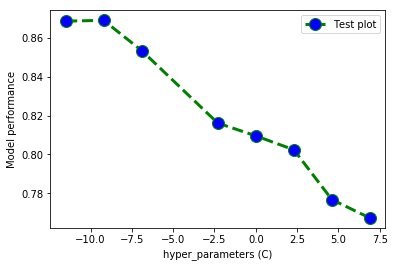

In [17]:
import math
hyper_parameters=gcv.get_params()['param_grid']['C']
#train_scores=gcv.cv_results_['mean_train_score'].tolist()
test_scores=gcv.cv_results_['mean_test_score'].tolist()

print(hyper_parameters)
print(test_scores)
#print(train_scores)

log_hyper_parameters=[math.log(i) for i in hyper_parameters]
print(log_hyper_parameters)

#plt.plot( =gcv.cv_results_ ,train_scores , label='Train plot')
plt.plot( log_hyper_parameters ,test_scores , color='green', linestyle='dashed', linewidth = 3,marker='o', markerfacecolor='blue', markersize=12,  label='Test plot')
plt.xlabel("hyper_parameters (C)")
plt.ylabel("Model performance")

plt.legend()

### Finding Metrics values , ploting ROC_AUC Curve and Confuion MAtrix

[1 1 1 ... 1 1 0]
Accuracy Score :  80.3125
Precision Score :  79.53714981729598
Recall Score :  81.625
F1 Score :  80.56755089450957
        
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.79      0.80       800
           1       0.80      0.82      0.81       800

    accuracy                           0.80      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.80      0.80      0.80      1600

        
AUC Score for train data : 0.9940625000000001
AUC Score for test data : 0.8031250000000001
        


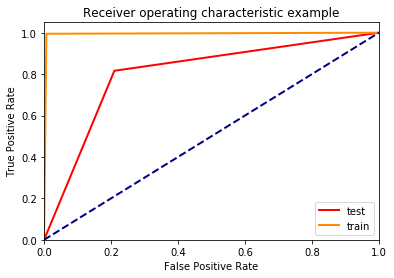

       

TrueNegative : 632
FalsePostive : 168
FalseNegative : 147
TruePostive  :  653
        
        


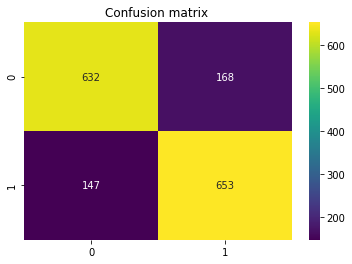

In [18]:
clf1=LogisticRegression(C=0.1,penalty='l1')
clf1.fit(X_train_tfidf,y_train)
pred_train=clf1.predict(X_train_tfidf)
pred=clf1.predict(X_test_tfidf)
print(pred)

print("Accuracy Score : ",accuracy_score(y_test,pred)*100)
print("Precision Score : ",precision_score(y_test,pred)*100)
print("Recall Score : ",recall_score(y_test,pred)*100)
print("F1 Score : ",f1_score(y_test,pred)*100)

print("        ")  
print("Classification Report")
print(classification_report(y_test,pred))
print("        ")  

fpr_train,tpr_train,thresholds_train=roc_curve(y_train,pred_train)
print("AUC Score for train data :",metrics.auc(fpr_train,tpr_train))

fpr,tpr,thresholds=roc_curve(y_test,pred)
print("AUC Score for test data :",metrics.auc(fpr,tpr))

print("        ")  

#y_true = # ground truth labels
#y_probas = # predicted probabilities generated by sklearn classifier
#skplt.metrics.plot_roc_curve(y_true, y_probas)
#plt.show()



plt.figure()
lw = 2
plt.plot(fpr, tpr, color='red',
         lw=lw,label='test')
plt.plot(fpr_train, tpr_train, color='darkorange',
         lw=lw,label='train')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()


print("       ")

tn, fp, fn, tp=confusion_matrix(y_test,pred).ravel()
print("""
TrueNegative : {}
FalsePostive : {}
FalseNegative : {}
TruePostive  :  {}""".format(tn, fp, fn, tp))
print("        ")  
print("        ")  

confusionmatrix_DF=pd.DataFrame(confusion_matrix(y_test,pred),columns=['0','1'],index=['0','1'])
sns.heatmap(confusionmatrix_DF,annot=True,fmt='g',cmap='viridis')
plt.title("Confusion matrix ")
plt.show()


## Important Features on TFIDF

In [83]:
feature_names=tf_idf_vect.get_feature_names()
coefs=sorted(zip(clf1.coef_[0],feature_names))

top20Negative=coefs[:20]
top20Postive=coefs[::-1][:20]

res_neg=pd.DataFrame(top20Negative,columns=['values','NegativeFeatures'])
res_pos=pd.DataFrame(top20Postive,columns=['values','PostiveFeatures'])
pd.concat([res_neg,res_pos],axis=1)

,values,NegativeFeatures,values,PostiveFeatures
0,-0.722997,waste,0.445144,great
1,-0.453383,worst,0.400175,best
2,-0.415952,poorly,0.394056,excellent
3,-0.373487,disappointment,0.361625,love
4,-0.364532,boring,0.286665,easy
5,-0.314739,bad,0.265113,perfect
6,-0.312126,disappointed,0.239801,amazing
7,-0.301654,returned,0.225382,glad
8,-0.297983,refund,0.207868,price
9,-0.268643,return,0.194073,intense


## Predicting unlabeled Reviews

In [27]:
data_list=["dvd/","electronics/","kitchen_&_housewares/"]
final_unlabeled=[]
for idx in range(3):

    unlabeled_file = data_list[idx] +"unlabeled.review"
    
    print("unlabeled_file file_name ::: {}".format(unlabeled_file))
    
    with open(unlabeled_file,'r',encoding='utf-8') as f:
        unlabeled = f.readlines()
    
    lst = []
   
    for i in range(len(unlabeled)):
        if(unlabeled[i]=="<review_text>\n"):
            lst.append(i)
        elif(unlabeled[i]=="</review_text>\n"):
            lst.append(i)   
        if(len(lst)==2):
            a=unlabeled[ lst[0]+1 : lst[1] ]
            stng=" ".join(a)
            lst.clear()
            final_unlabeled.append(stng.replace("\n",""))
            
    
    print("total number of rows in final_unlabeled file :::: {}".format(len(final_unlabeled)))


unlabeled_file file_name ::: dvd/unlabeled.review
total number of rows in final_unlabeled file :::: 34741
unlabeled_file file_name ::: electronics/unlabeled.review
total number of rows in final_unlabeled file :::: 47894
unlabeled_file file_name ::: kitchen_&_housewares/unlabeled.review
total number of rows in final_unlabeled file :::: 64679


In [0]:
#x_test=preprocess(["dvd/unlabeled.review","electronics/unlabeled.review","kitchen_&_housewares/unlabeled.review"])
final_unlabeled = [ i.replace("aren't","are not").replace("couldn't","could not").replace("wasn't","was not") for i in final_unlabeled ]
final_unlabeled = [ i.replace("weren't","were not").replace("mustn't","must not").replace("won't","not").replace("wouldn't","would not") for i in final_unlabeled ]
final_unlabeled = [re.sub(r'[^a-zA-Z ]',r'' , (" ".join([lemmatizer.lemmatize(i.lower()) for i in line.split()  if i not in modified_stopwords])) ) for line in final_unlabeled ]
final_unlabeled = [line for line in final_unlabeled if line!='']

In [0]:
unlabeled_tfidf     =  tf_idf_vect.transform(final_unlabeled)
unlabeled_tfidf     =  scaler.transform(unlabeled_tfidf)
unlabel_predicted   =  clf1.predict(unlabeled_tfidf)

## Storing Unlabled predicted reviews in a file
1. storing unlabeled_postive_reviews in unlabeled_postive_review file
2. storing unlabeled_negative_reviews in unlabeled_negativee_review file

In [0]:
predicted=unlabel_predicted.tolist()

neg_index  =  [index for index in range(len(predicted)) if(predicted[index]==0)]
pos_index  =  [index for index in range(len(predicted)) if(predicted[index]==1)]

with open("unlabeled_postive_review",'w',encoding='utf-8') as f:
  for i in range(len(pos_index)):
    f.write(final_unlabeled[i])
    f.write("\n")
    
with open("unlabeled_negative_review",'w',encoding='utf-8') as f:
  for i in range(len(neg_index)):
    f.write(final_unlabeled[i])
    f.write("\n")